# <div align="center" style="color: ;">Mela requested to Provide the PID and TSA based on customer Mobile Number</div>

<b>Created by Dwaipayan</b>

In [1]:
# %% [markdown]
# # Jupyter Notebook Loading Header
#
# This is a custom loading header for Jupyter Notebooks in Visual Studio Code.
# It includes common imports and settings to get you started quickly.

# %% [markdown]
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud import bigquery
import os
path = r'C:\Users\DwaipayanChakroborti\AppData\Roaming\gcloud\legacy_credentials\dchakroborti@tonikbank.com\adc.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = path
client = bigquery.Client(project='prj-prod-dataplatform')

# %% [markdown]
## Configure Settings
# Set options or configurations as needed
pd.set_option('display.max_columns', None)

In [2]:
# Read the csv fileI have created from the excel sheet provided by Mela

df = pd.read_csv(r"C:\Users\DwaipayanChakroborti\OneDrive - Tonik Financial Pte Ltd\MyStuff\Mela Sombillo csombillo1@tonikbank.com\Working File_Fraud Blacklist as of 18Jun24 (version 1) AF Request\Fraudlistfile.csv")
df.shape

(14857, 31)

In [3]:
df.tail()

,id,cust_first_name,cust_middle_name,cust_last_name,cust_gov_id,cust_dob,cust_tin1,cust_tin2,cust_email1,cust_email2,cust_mobile1,cust_mobile2,cust_ref_mobile1,cust_ref_mobile2,cust_dev_id,created_dt,created_by,Full Name,TSA,PID,flexi_field2,flexi_field3,flexi_field4,updated_dt,updated_by,partyId,isDeleted,remarks,fraud_status,Fraud Accounts Masterlist (source),With Loan Release (Y/N)
14852,NaN,ROSEMAR,JENIE,ANNE,NaN,23-04-2000,0.0,NaN,ruzzwebb@gmail.com,NaN,639932158251,NaN,0.000000e+00,0.000000e+00,NaN,NaN,NaN,ROSEMAR JENIE ANNE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14853,NaN,ANGELICA,MAGPUGAY,SALAZAR,7475112384,13-08-1998,773964512.0,NaN,gecasalazar1327@gmail.com,NaN,639976588730,NaN,6.397525e+11,6.393653e+11,NaN,NaN,NaN,ANGELICA MAGPUGAY SALAZAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14854,NaN,ELIEZEREY,PERIA,SEBANTA,20240514ojbE639106629776,08-07-2000,775950420.0,NaN,eliezereysebanta7@gmail.com,NaN,639106629776,NaN,6.391043e+11,6.393823e+11,NaN,NaN,NaN,ELIEZEREY PERIA SEBANTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14855,NaN,NICOLE ANN,VALENCIA,SAGUN,NaN,06-02-1998,0.0,NaN,carmelitaval139@gmail.com,NaN,639610767062,NaN,6.396108e+11,6.396108e+11,NaN,NaN,NaN,NICOLE ANN VALENCIA SAGUN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14856,NaN,KRISTINE,ARCILLA,RODRIGUEZ,7.06853E+11,29-06-1991,0.0,NaN,enits6092@gmail.com,NaN,639518949704,NaN,6.395189e+11,6.395189e+11,NaN,NaN,NaN,KRISTINE ARCILLA RODRIGUEZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['id', 'cust_first_name', 'cust_middle_name', 'cust_last_name',
       'cust_gov_id', 'cust_dob', 'cust_tin1', 'cust_tin2', 'cust_email1',
       'cust_email2', 'cust_mobile1', 'cust_mobile2', 'cust_ref_mobile1',
       'cust_ref_mobile2', 'cust_dev_id', 'created_dt', 'created_by',
       'Full Name', 'TSA', 'PID', 'flexi_field2', 'flexi_field3',
       'flexi_field4', 'updated_dt', 'updated_by', 'partyId', 'isDeleted',
       'remarks', 'fraud_status', 'Fraud Accounts Masterlist (source)',
       'With Loan Release (Y/N)'],
      dtype='object')

In [12]:
df['mobile'] = df['cust_mobile1'].astype(str)  # Ensure the column is treated as string for manipulation

def extract_10_digit_number(mobile):
    # Remove any non-digit characters
    digits = ''.join(filter(str.isdigit, mobile))
    # Extract the last 10 digits (if more than 10)
    return digits[-10:]

df['mobile_10_digits'] = df['mobile'].apply(extract_10_digit_number)


In [14]:
a = tuple(df['mobile_10_digits'])
a[0:5]

('9517808068', '9662183092', '9669451522', '9772608003', '9673953880')

In [15]:
sq = f"""with
cd as
(select customer_id, new_mobile_number mobile from `risk_credit_mis.customer_contact_details`
union all 
select customer_id, old_mobile_number mobile from `risk_credit_mis.customer_contact_details` where old_mobile_number is not null 
)
select customer_id, mobile from cd where right(mobile, 10) in {a}"""

df1 = client.query(sq).to_dataframe()

In [16]:
df1.sample(5)

,customer_id,mobile
5590,1360854,639923475324
1349,1155925,639558971162
4083,1215702,639610771014
9089,1621474,639469196186
14329,2513967,639947121948


In [20]:
df2 = df[['cust_first_name', 'cust_middle_name', 'cust_last_name', 'mobile']].copy()

In [21]:
df2 = df2.merge(df1, left_on='mobile', right_on='mobile', how = 'left')

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


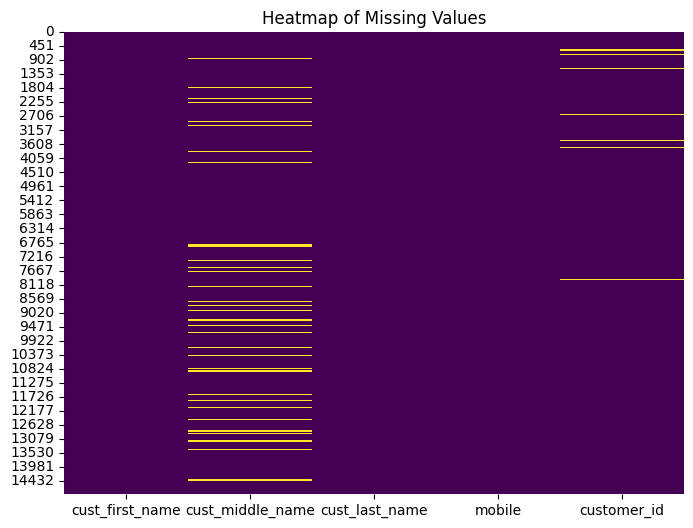

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(df2.isnull(), cmap='viridis', cbar=False)
plt.title('Heatmap of Missing Values')
plt.show()


In [24]:
# Count missing values in each column
missing_values_count = df2.isna().sum()

print("Count of missing values in each column:")
print(missing_values_count)

Count of missing values in each column:
cust_first_name        0
cust_middle_name    1213
cust_last_name         0
mobile                 0
customer_id          292
dtype: int64


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14857 entries, 0 to 14856
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   cust_first_name   14857 non-null  object
 1   cust_middle_name  13644 non-null  object
 2   cust_last_name    14857 non-null  object
 3   mobile            14857 non-null  object
 4   customer_id       14565 non-null  Int64 
dtypes: Int64(1), object(4)
memory usage: 595.0+ KB


In [40]:
df2.to_csv("customeridformobilenumber.csv", index = False)

Remove the rows where the customer id is missing or mobile number is not correct. Save it to another file

In [41]:
df2 = pd.read_csv(r"C:\Users\DwaipayanChakroborti\OneDrive - Tonik Financial Pte Ltd\MyStuff\Mela Sombillo csombillo1@tonikbank.com\Working File_Fraud Blacklist as of 18Jun24 (version 1) AF Request\customeridformobilenumber.csv")
df2.shape

(14565, 5)

In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14565 entries, 0 to 14564
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   cust_first_name   14565 non-null  object
 1   cust_middle_name  13372 non-null  object
 2   cust_last_name    14565 non-null  object
 3   mobile            14565 non-null  int64 
 4   customer_id       14565 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 569.1+ KB


In [46]:
b = tuple(df2['customer_id'])
b[0:5]

(1092455, 1094896, 1187995, 1172669, 1188326)

In [48]:
sql = f"""
with base as (
select cast(coalesce(OFCUSTOMERID, '0') as integer) customer_id, OFSTANDARDACCOUNTID 
from prj-prod-dataplatform.core_raw.customer_accounts 
where CRINTERDESC = 'Transactional Savings Account Inv_R')
select * from base where  customer_id in {b} """

print(sql)

df3 = client.query(sql).to_dataframe()
df3.sample(5)




with base as (
select cast(coalesce(OFCUSTOMERID, '0') as integer) customer_id, OFSTANDARDACCOUNTID 
from prj-prod-dataplatform.core_raw.customer_accounts 
where CRINTERDESC = 'Transactional Savings Account Inv_R')
select * from base where  customer_id in (1092455, 1094896, 1187995, 1172669, 1188326, 1189230, 1173556, 1177815, 1189994, 1037295, 1173766, 1142951, 1190347, 1156566, 1195189, 1174855, 1193851, 1195729, 1195471, 1182270, 1191180, 1176362, 1176178, 1157041, 1156227, 1156353, 1194595, 1156287, 1158682, 1158733, 1184060, 1156321, 1194375, 1156553, 1158632, 1157244, 1194458, 1153592, 1153941, 1153925, 1154134, 1154183, 1154230, 1154326, 1156668, 1159290, 1159338, 1153702, 1153728, 1153724, 1153738, 1198139, 1145288, 1145306, 1145314, 1191119, 1194658, 1182627, 1182631, 1182539, 1183753, 1194721, 1199044, 1101869, 1186603, 1156944, 1156753, 1157738, 1157412, 1194443, 1187584, 1158302, 1191769, 1161486, 1196066, 1160923, 1158721, 1158721, 1171751, 1171719, 1168957, 1171635, 1189

,customer_id,OFSTANDARDACCOUNTID
6698,1295243,60812952430005
13394,1150941,60811509410008
2909,1492983,60814929830004
2177,1173594,60811735940001
872,1206631,60812066310002


In [49]:
df4 = df2.merge(df3, left_on='customer_id', right_on='customer_id', how = 'left')
df4.sample(5)

,cust_first_name,cust_middle_name,cust_last_name,mobile,customer_id,OFSTANDARDACCOUNTID
7503,MELDY,SASING,ONDA,639107726663,1554745,60815547450006
12202,ONYEMAECHI,CYRIACUS,OGWO,639294831828,1901454,60819014540005
11759,SITTIE NIHAYA,TAMBARA,ALIPONTO,639955329158,1105678,60811056780007
2223,ARVIN KEITH,RAMOS,DEGUZMAN,639566033777,1300064,60813000640005
7738,RONEL,SUMALINOG,SELPO,639106494447,1568085,60815680850004


In [53]:
df = df.merge(df4, left_on='cust_mobile1', right_on='mobile', how = 'left')
df.sample(5)

,id,cust_first_name_x,cust_middle_name_x,cust_last_name_x,cust_gov_id,cust_dob,cust_tin1,cust_tin2,cust_email1,cust_email2,cust_mobile1,cust_mobile2,cust_ref_mobile1,cust_ref_mobile2,cust_dev_id,created_dt,created_by,Full Name,TSA,PID,flexi_field2,flexi_field3,flexi_field4,updated_dt,updated_by,partyId,isDeleted,remarks,fraud_status,Fraud Accounts Masterlist (source),With Loan Release (Y/N),mobile_x,mobile_10_digits,cust_first_name_y,cust_middle_name_y,cust_last_name_y,mobile_y,customer_id,OFSTANDARDACCOUNTID
11444,18290.0,EDWARD,DELA CRUZ,PARIAL,P2031084B,24-07-1976,639357696.0,NaN,edwardparial39@gmail.com,NaN,639357696372,NaN,6.393577e+11,6.393577e+11,03dda7ef727e4abc9c98b1f31edfee39fJWbmvk4,25-11-2022 02:56,jdebelen@tonikbank.com,EDWARD DELA CRUZ PARIAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,639357696372,9357696372,EDWARD,DELA CRUZ,PARIAL,6.393577e+11,1792785.0,60817927850008
14696,30529.0,MARSHALL ERIKSON,HILAY,MAGLASANG,D0612008328,20-12-1999,0.0,NaN,shalrikson@gmail.com,NaN,639262543927,6.392630e+11,6.392625e+11,6.392625e+11,37bc47076a5a4463995108f8c9c81f469oq7XlOJ,27-09-2023 14:33,adalumpines@tonikbank.com,MARSHALL ERIKSON HILAY MAGLASANG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,639262543927,9262543927,MARSHALL ERIKSON,HILAY,MAGLASANG,6.392625e+11,2178374.0,60821783740008
2751,8518.0,SARAH MAE,BABUYO,DOMINGO,824025627,01-08-1993,777814775.0,NaN,domingosarahmae93@gmail.com,NaN,639107903578,NaN,6.391079e+11,6.391079e+11,af7e9fd990374064a9d0af19043584d11rC57FbZ,26-04-2022 05:42,amercado@tonikbank.com,SARAH MAE BABUYO DOMINGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,639107903578,9107903578,SARAH MAE,BABUYO,DOMINGO,6.391079e+11,1340424.0,60813404240009
7420,13841.0,JACKIELYN,MANUIT,ESCOBAR,3447929259,06-09-1995,319116318.0,NaN,jackielyn.manuit@gmail.com,NaN,639095903086,NaN,6.390959e+11,6.390959e+11,b7067e9e143f444ea96a9a3b914f783butQkFeEO,04-08-2022 11:19,kpalacio@tonikbank.com,JACKIELYN MANUIT ESCOBAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,639095903086,9095903086,JACKIELYN,MANUIT,ESCOBAR,6.390959e+11,1394179.0,60813941790006
4715,10896.0,EMERLITO,SEBASTIAN,DAYAO,B0419005726,06-12-1974,943424549.0,NaN,simko9653@gmail.com,NaN,639050284378,NaN,6.390503e+11,6.390503e+11,17655f759e7c4842839f3428fafdce18bpdbhbyt,23-06-2022 11:36,amercado@tonikbank.com,EMERLITO SEBASTIAN DAYAO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,639050284378,9050284378,EMERLITO,SEBASTIAN,DAYAO,6.390503e+11,1153634.0,60811536340002


In [54]:
df.shape

(15345, 39)

In [55]:
df.to_excel("Finaldatamobilecustomeridtsa.xlsx", index = False)

Remove the Duplicate after downloading the file before sharing